In [37]:
import os
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import matplotlib.patches as mpatches

In [12]:
df = pd.read_excel("E:\Parkinson's\Parkinson_raw_data.xlsx")
parkinson = df.copy()

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\USER\AppData\Local\Temp\ipykernel_35060\4200956217.py:1: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_excel("E:\Parkinson's\Parkinson_raw_data.xlsx")


In [15]:
df.head()

,ILMN_Gene,GSM1318547,GSM1318548,GSM1318549,GSM1318550,GSM1318551,GSM1318552,GSM1318553,GSM1318554,GSM1318555,GSM1318556,Mean_PD,MeanNon_PD
0,7A5,17.93,26.54,16.93,31.19,15.51,7.52,51.30,23.38,19.18,39.45,21.620,28.166
1,A1BG,58.92,64.21,42.84,64.63,66.09,31.79,89.97,55.23,42.88,66.16,59.338,57.206
2,A1CF,14.83,20.06,4.86,-9.32,-4.91,21.14,17.69,-32.98,1.40,-12.13,5.104,-0.976
3,A26C3,27.82,-23.46,19.98,34.96,-28.98,34.62,45.07,60.42,31.41,-17.96,6.064,30.712
4,A2BP1,-70.15,-67.46,-47.76,-55.73,-21.56,-62.66,-103.60,-98.13,-71.83,-76.75,-52.532,-82.594


In [14]:
##Calculation Sample Mean of PD and Non PD gene expression
df['Mean_PD'] = df[['GSM1318547', 'GSM1318548', 'GSM1318549', 'GSM1318550', 'GSM1318551']].mean(axis=1)
df['MeanNon_PD'] = df[['GSM1318552', 'GSM1318553', 'GSM1318554', 'GSM1318555', 'GSM1318556']].mean(axis=1)

In [17]:
##Calculating T-statistic and P-value
results = []
for index, row in df.iterrows():
    pd_values = row[['GSM1318547', 'GSM1318548', 'GSM1318549','GSM1318550', 'GSM1318551']].tolist()
    nonpd_values = row[['GSM1318552', 'GSM1318553','GSM1318554', 'GSM1318555', 'GSM1318556']].tolist()
    
    try:
        t_stat, p_value = ttest_ind(pd_values, nonpd_values, nan_policy='omit')
        results.append({'ILMN_Gene': row['ILMN_Gene'], 'T-statistic': t_stat, 'P-value': p_value})
    except ValueError as e:
        print(f"Error for gene {row['ILMN_Gene']}: {e}")
        

results_df = pd.DataFrame(results)
print(results_df)

      ILMN_Gene  T-statistic   P-value
0           7A5    -0.787716  0.453567
1          A1BG     0.195504  0.849873
2          A1CF     0.531362  0.609600
3         A26C3    -1.310476  0.226405
4         A2BP1     2.561135  0.033588
...         ...          ...       ...
34597    ZYG11A     1.000052  0.346570
34598    ZYG11B    -6.542083  0.000180
34599       ZYX    -1.081914  0.310821
34600     ZZEF1    -0.272708  0.791985
34601      ZZZ3    -0.649558  0.534179

[34602 rows x 3 columns]


In [18]:
##Merging dataset
df2 = pd.merge(df, results_df, on='ILMN_Gene', how='inner')
df2.head()

,ILMN_Gene,GSM1318547,GSM1318548,GSM1318549,GSM1318550,GSM1318551,GSM1318552,GSM1318553,GSM1318554,GSM1318555,GSM1318556,Mean_PD,MeanNon_PD,T-statistic,P-value
0,7A5,17.93,26.54,16.93,31.19,15.51,7.52,51.30,23.38,19.18,39.45,21.620,28.166,-0.787716,0.453567
1,A1BG,58.92,64.21,42.84,64.63,66.09,31.79,89.97,55.23,42.88,66.16,59.338,57.206,0.195504,0.849873
2,A1CF,14.83,20.06,4.86,-9.32,-4.91,21.14,17.69,-32.98,1.40,-12.13,5.104,-0.976,0.531362,0.609600
3,A26C3,27.82,-23.46,19.98,34.96,-28.98,34.62,45.07,60.42,31.41,-17.96,6.064,30.712,-1.310476,0.226405
4,A2BP1,-70.15,-67.46,-47.76,-55.73,-21.56,-62.66,-103.60,-98.13,-71.83,-76.75,-52.532,-82.594,2.561135,0.033588


C:\Users\USER\AppData\Local\Temp\ipykernel_35060\1825441476.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([filtered_mean_pd, filtered_mean_non_pd], labels=['Mean PD', 'Mean Non PD'], showmeans=True)


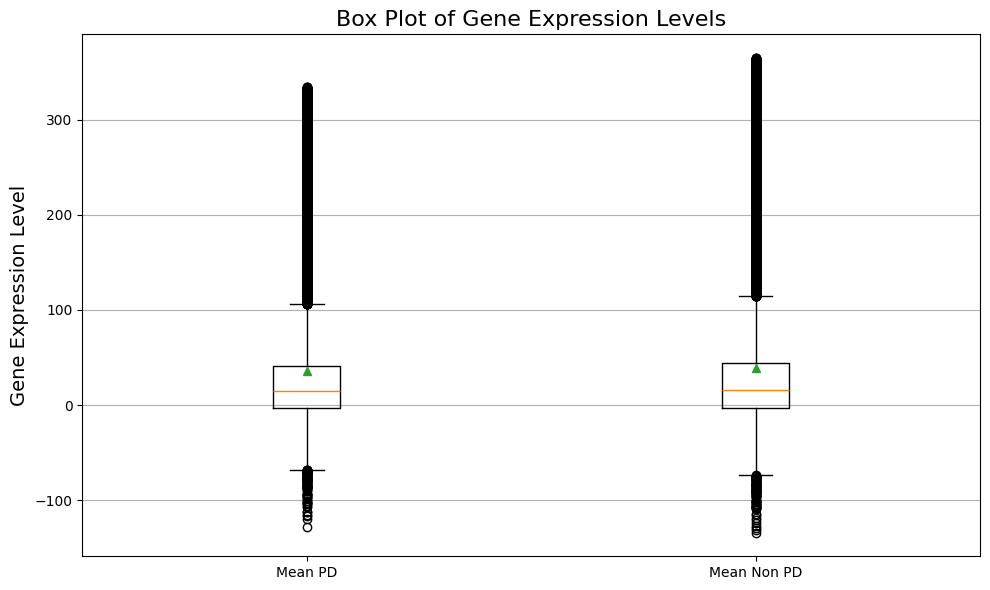

In [21]:
##Box plot to see gene expression in PD and Non PD samples
def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

filtered_mean_pd = remove_outliers(df2['Mean_PD'])
filtered_mean_non_pd = remove_outliers(df2['MeanNon_PD'])


plt.figure(figsize=(10, 6))
plt.boxplot([filtered_mean_pd, filtered_mean_non_pd], labels=['Mean PD', 'Mean Non PD'], showmeans=True)

plt.title('Box Plot of Gene Expression Levels', fontsize=16)
plt.ylabel('Gene Expression Level', fontsize=14)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

In [23]:
sample_list = ['GSM1318547','GSM1318548', 'GSM1318549', 'GSM1318550', 'GSM1318551', 'GSM1318552',
       'GSM1318553', 'GSM1318554', 'GSM1318555', 'GSM1318556']

sample_mean_list = [df2[sample].mean() for sample in sample_list]
sample_mean_list

[np.float64(7223.804727761401),
 np.float64(8116.089857811687),
 np.float64(7276.34118634761),
 np.float64(7160.277083983585),
 np.float64(6672.264271718398),
 np.float64(7307.5185076007165),
 np.float64(6076.980307207677),
 np.float64(7322.45486850471),
 np.float64(7381.489164210161),
 np.float64(6581.07898156176)]

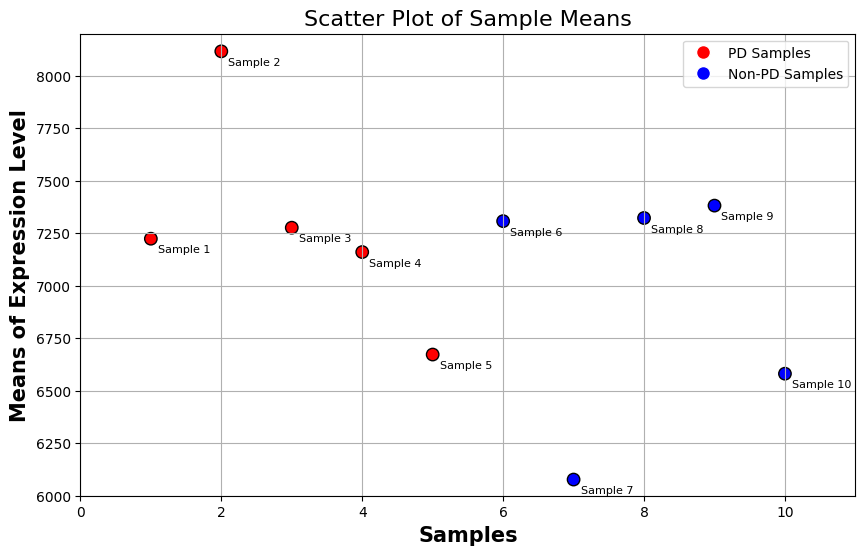

In [25]:
##Scatter Plot analysis of gene expression of individual PD and Non PD samples
sample_list = [f'Sample {i+1}' for i in range(len(sample_mean_list))]

colors = ['red' if i < 5 else 'blue' for i in range(len(sample_mean_list))]


plt.figure(figsize=(10, 6))
scatter = plt.scatter(np.arange(1, len(sample_mean_list) + 1), sample_mean_list, c=colors, s=80, edgecolors='black')


for i, txt in enumerate(sample_list):
    plt.annotate(txt, (i + 1, sample_mean_list[i]), fontsize=8, xytext=(5, -10), textcoords='offset points')

red_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='PD Samples')
blue_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Non-PD Samples')
plt.legend(handles=[red_patch, blue_patch], loc='upper right')


plt.ylabel('Means of Expression Level', fontsize=15, fontweight='bold')
plt.xlabel('Samples', fontsize=15, fontweight='bold')
plt.ylim(6000, 8200)  
plt.xlim(0, len(sample_mean_list) + 1)


plt.title('Scatter Plot of Sample Means', fontsize=16)
plt.grid()
plt.show()


In [27]:
##One way ANNOVA
pd_samples = np.array([7223.80, 8116.09, 7276.34, 7160.28, 6672.26])
non_pd_samples = np.array([7307.52, 6076.98, 7322.45, 7381.49, 6581.07])

f_statistic, p_value = stats.f_oneway(pd_samples, non_pd_samples)

print(f"F-statistic: {f_statistic}, P-value: {p_value}")

F-statistic: 1.040034427807356, P-value: 0.33766006842590435


e:\Parkinson's\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


34602
34602
Total Genes: 34602
Upregulated Genes: 910
Downregulated Genes: 3028
Not Significant Genes: 30332
Irrelevant Genes: 332


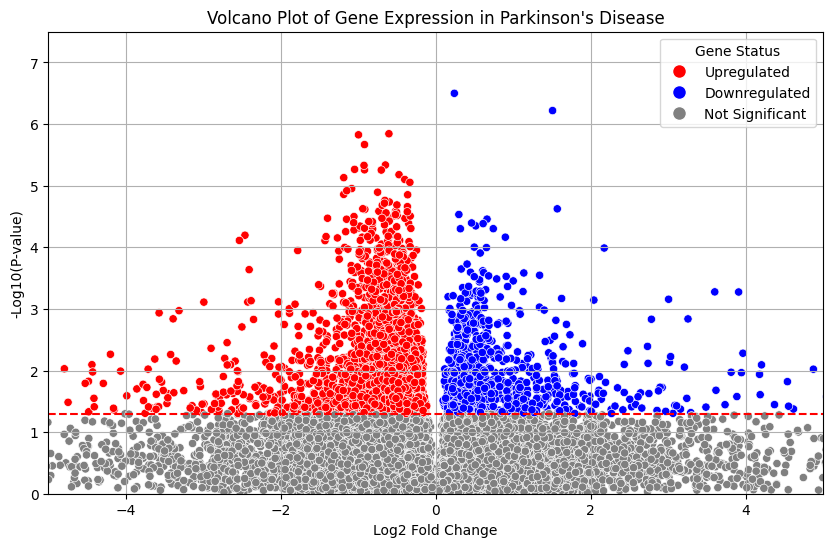

In [28]:
##Volcano Plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df4 = df2.copy()
df4['FoldChange'] = np.log2(df4['Mean_PD'] / df4['MeanNon_PD'])
print(len(df4['FoldChange']))


df4['-log10(P-value)'] = -np.log10(df4['P-value'])
print(len(df4['-log10(P-value)']))

non_significant_count = 0
up_regulated = 0
down_regulated = 0


def get_color(row):
    if row['P-value'] < 0.05: 
        if row['FoldChange'] > 0:
            return 'red'  
        else:
            return 'blue'  
    else:
        return 'grey' 

df4['Color'] = df4.apply(get_color, axis=1)

total_genes = df4.shape[0]
print(f'Total Genes: {total_genes}')  ##34602
# Initialize counts
upregulated_count = 0
downregulated_count = 0
nonsignificant_count = 0
irrelevant_genes = 0

up_gene = []
down_gene = []


for index, row in df4.iterrows():
    p_value = row['P-value']
    fold_change = row['FoldChange']
    gene = row['ILMN_Gene']
    
    if p_value < 0.05 and fold_change > 0:
        upregulated_count += 1
        up_gene.append(gene)
    elif p_value < 0.05 and fold_change < 0:
        downregulated_count += 1
        down_gene.append(gene)
    elif p_value >= 0.05:
        nonsignificant_count += 1
    else:
        irrelevant_genes += 1




print(f'Upregulated Genes: {upregulated_count}')
print(f'Downregulated Genes: {downregulated_count}')
print(f'Not Significant Genes: {nonsignificant_count}')
print(f'Irrelevant Genes: {irrelevant_genes}')



plt.figure(figsize=(10, 6))
sns.scatterplot(data=df4, x='FoldChange', y='-log10(P-value)', hue='Color', palette=['grey', 'red', 'blue'], legend=False)


plt.axhline(y=-np.log10(0.05), color='red', linestyle='--')


plt.title('Volcano Plot of Gene Expression in Parkinson\'s Disease')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10(P-value)')
plt.xlim(-5, 5)  
plt.ylim(0, df4['-log10(P-value)'].max() + 1)


red_patch = plt.Line2D([0], [0], marker='o', color='w', label='Upregulated', markerfacecolor='red', markersize=10)
blue_patch = plt.Line2D([0], [0], marker='o', color='w', label='Downregulated', markerfacecolor='blue', markersize=10)
grey_patch = plt.Line2D([0], [0], marker='o', color='w', label='Not Significant', markerfacecolor='grey', markersize=10)
plt.legend(handles=[red_patch, blue_patch, grey_patch], title='Gene Status')


plt.grid()
plt.show()



In [31]:
##Counting all upregulated and downregulated Genes
upregulated = df4[df4['FoldChange'] > 0].sort_values(by='FoldChange', ascending=False)
downregulated = df4[df4['FoldChange'] < 0].sort_values(by='FoldChange', ascending=True)

up_genes  = upregulated['ILMN_Gene'].to_list()
down_genes  = downregulated['ILMN_Gene'].to_list()

print(f"Number of upregulated Genes:{len(up_genes)} | Number of downregulated Genes:{len(down_genes)}")

Number of upregulated Genes:12469 | Number of downregulated Genes:19475


e:\Parkinson's\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
e:\Parkinson's\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
e:\Parkinson's\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


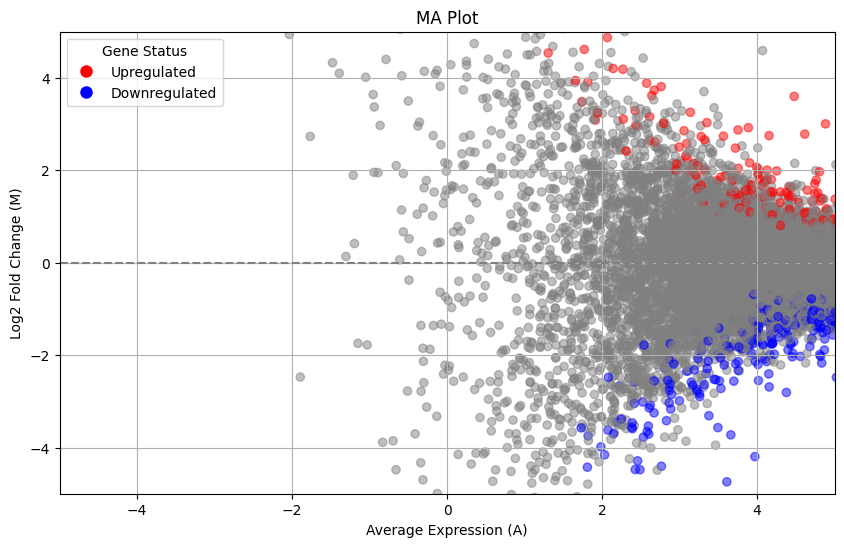

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df4['M'] = np.log2(df4['Mean_PD'] / df4['MeanNon_PD'])
df4['A'] = 0.5 * (np.log2(df4['Mean_PD']) + np.log2(df4['MeanNon_PD']))


df4['Color'] = 'grey'  
df4.loc[(df4['P-value'] < 0.05) & (df4['M'] > 0), 'Color'] = 'red' 
df4.loc[(df4['P-value'] < 0.05) & (df4['M'] < 0), 'Color'] = 'blue'  

plt.figure(figsize=(10, 6))


plt.scatter(df4['A'], df4['M'], alpha=0.5, c=df4['Color'])

plt.axhline(y=0, color='grey', linestyle='--')


plt.title('MA Plot')
plt.xlabel('Average Expression (A)')
plt.ylabel('Log2 Fold Change (M)')
plt.xlim(-5, 5)  
plt.ylim(-5, 5)  


red_patch = plt.Line2D([0], [0], marker='o', color='w', label='Upregulated', markerfacecolor='red', markersize=10)
blue_patch = plt.Line2D([0], [0], marker='o', color='w', label='Downregulated', markerfacecolor='blue', markersize=10)
plt.legend(handles=[red_patch, blue_patch], title='Gene Status')


plt.grid()
plt.show()


In [63]:
##Gene Ontology Analysis
from gprofiler import GProfiler

gp = GProfiler()
gene_of_interest = up_genes + down_genes
gp_results = gp.profile(organism='hsapiens', query=gene_of_interest)


df_results = pd.DataFrame(gp_results)

In [64]:
df_result_backup = df_results.copy()

In [65]:
# Fill NaN values in the 'source' column with 'Unknown'
df_results['source'] = df_results['source'].fillna('Unknown')

# Print unique values in the source column before filtering
print("Unique sources before filtering:")
print(df_results['source'].unique())

# Specify the sources to include
valid_sources = ['GO:CC', 'GO:MF', 'GO:BP']

# Filter for significant terms that match valid sources
significant_terms = df_results[(df_results['significant']) & (df_results['source'].isin(valid_sources))]

# Check if there are any 'Unknown' values left
print("After filtering, checking for 'Unknown' sources:")
print(significant_terms[significant_terms['source'] == 'Unknown'])

# Sort the significant terms by intersection size
significant_terms = significant_terms.sort_values(by='intersection_size', ascending=False)

print("Unique sources in significant_terms:")
print(significant_terms['source'].unique())



Unique sources before filtering:
['GO:MF' 'GO:CC' 'GO:BP' 'TF' 'HPA' 'MIRNA' 'KEGG' 'REAC' 'WP' 'CORUM'
 'HP']
After filtering, checking for 'Unknown' sources:
Empty DataFrame
Columns: [description, effective_domain_size, intersection_size, name, native, p_value, parents, precision, query, query_size, recall, significant, source, term_size]
Index: []
Unique sources in significant_terms:
['GO:CC' 'GO:BP' 'GO:MF']


C:\Users\USER\AppData\Local\Temp\ipykernel_35060\2312871452.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_terms['color'] = top_terms['source'].map(color_map)


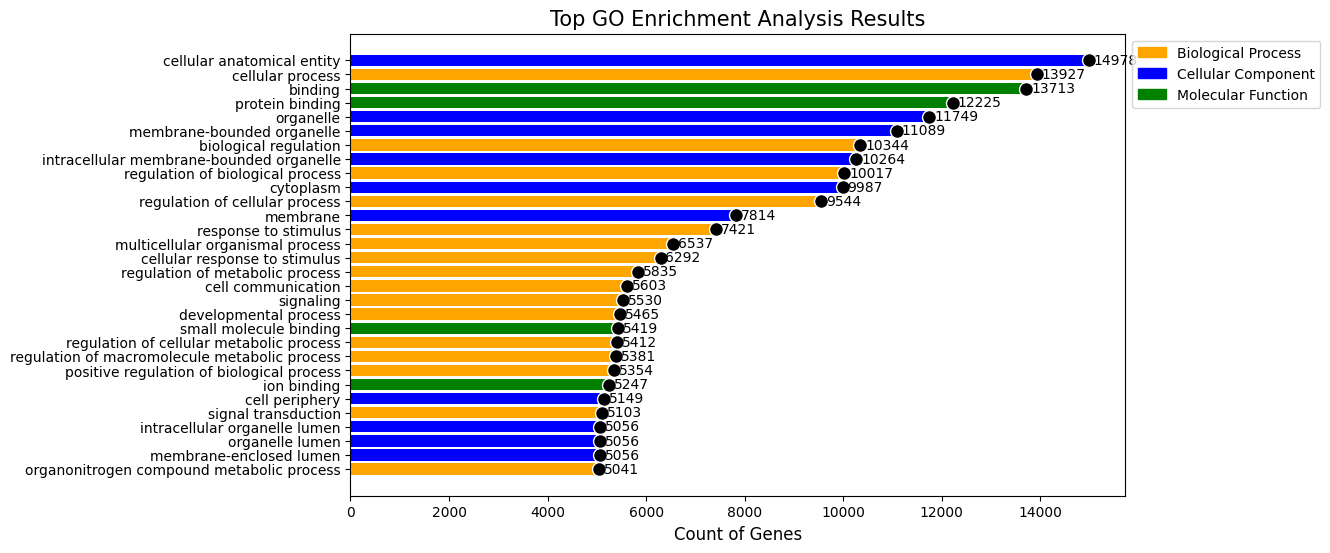

In [67]:
# GO analysis of top 30 significant terms
top_terms = significant_terms.head(30)


color_map = {
    'GO:BP': 'orange',  
    'GO:CC': 'blue',    
    'GO:MF': 'green'    
}


top_terms['color'] = top_terms['source'].map(color_map)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_terms['name'], top_terms['intersection_size'], color=top_terms['color'])


for bar, intersection in zip(bars, top_terms['intersection_size']):
    plt.scatter(bar.get_x() + bar.get_width(), bar.get_y() + bar.get_height() / 2,
                s=100, color='black', edgecolor='white')
    plt.text(bar.get_x() + bar.get_width() + 100, bar.get_y() + bar.get_height() / 2,
             f'{intersection}', va='center', ha='left', fontsize=10)


plt.xlabel('Count of Genes', fontsize=12)
plt.title('Top GO Enrichment Analysis Results', fontsize=15)


handles = [mpatches.Patch(color=color_map['GO:BP'], label='Biological Process'),
           mpatches.Patch(color=color_map['GO:CC'], label='Cellular Component'),
           mpatches.Patch(color=color_map['GO:MF'], label='Molecular Function')]

plt.legend(handles=handles, loc='upper left', bbox_to_anchor=(1, 1))
plt.gca().invert_yaxis() 
plt.show()


In [ ]:
##Gene Network Interaction
import requests
import pandas as pd
from io import StringIO

all_interactions = []

for i in range(159):
    a = 1 + (i * 200)  
    b = a + 200        
    sub_gene = gene_of_interest[a:b]  
    
    
    STRING_API_URL = "https://string-db.org/api/tsv/network"
 
    response = requests.get(STRING_API_URL, params={"identifiers": "%0D".join(sub_gene), "species": "9606", "add_scores": "true"})
    
    if response.status_code == 200:
        interaction_data = response.text

        interactions_df = pd.read_csv(StringIO(interaction_data), sep='\t')

        all_interactions.append(interactions_df)

        print(a,b,'---->',i)
    else:
        print(f"Failed to fetch data for chunk {i}: {response.status_code}")

final_interactions_df = pd.concat(all_interactions, ignore_index=True)

print(final_interactions_df.head())


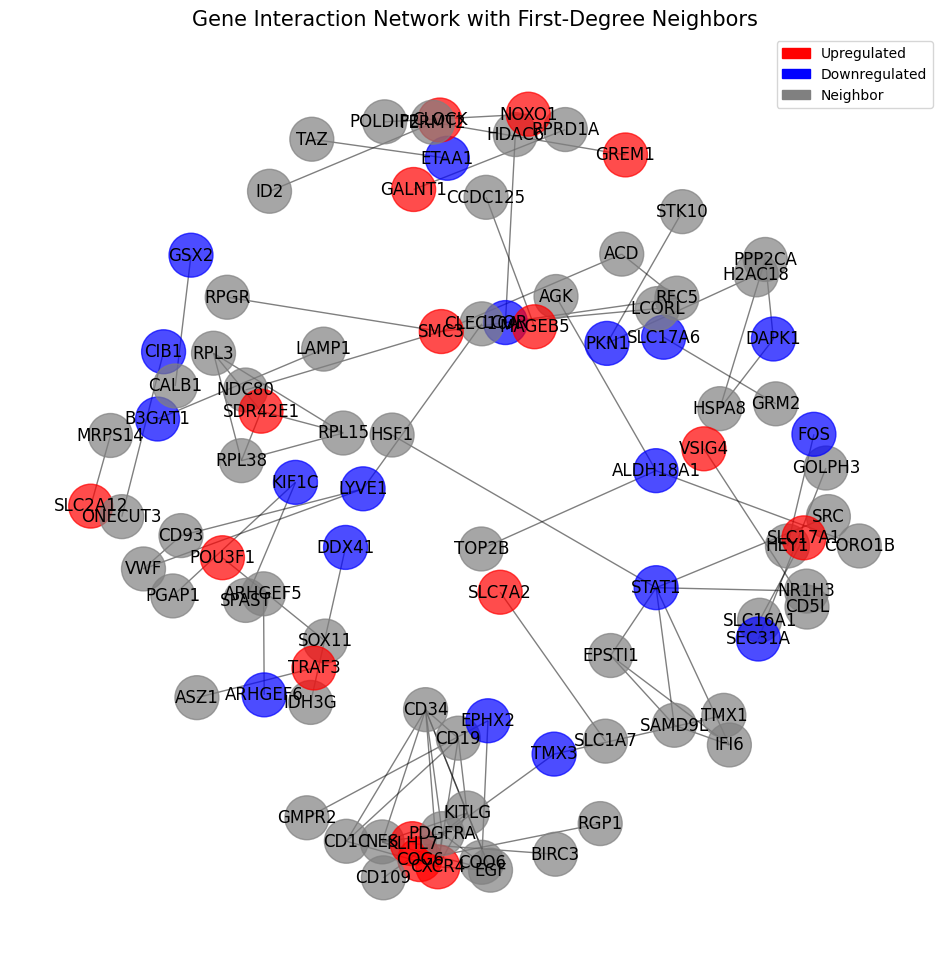

In [71]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import random

G = nx.from_pandas_edgelist(final_interactions_df, source='preferredName_A', target='preferredName_B', edge_attr='score')

selected_upregulated_nodes = random.sample(up_genes, min(100, len(up_genes)))
selected_downregulated_nodes = random.sample(down_genes, min(100, len(down_genes)))

selected_upregulated_nodes = [node for node in selected_upregulated_nodes if node in G.nodes]
selected_downregulated_nodes = [node for node in selected_downregulated_nodes if node in G.nodes]

neighbors_up = list(set([neighbor for node in selected_upregulated_nodes for neighbor in G.neighbors(node)]))
neighbors_down = list(set([neighbor for node in selected_downregulated_nodes for neighbor in G.neighbors(node)]))

selected_nodes_with_neighbors = selected_upregulated_nodes + selected_downregulated_nodes + neighbors_up + neighbors_down

filtered_graph_with_neighbors = G.subgraph(selected_nodes_with_neighbors)

color_map = []
for node in filtered_graph_with_neighbors.nodes:
    if node in selected_upregulated_nodes:
        color_map.append('red')
    elif node in selected_downregulated_nodes:
        color_map.append('blue')
    else:
        color_map.append('gray') 

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(filtered_graph_with_neighbors, k=0.5, iterations=50)  
nx.draw_networkx_nodes(filtered_graph_with_neighbors, pos, node_color=color_map, node_size=1000, alpha=0.7)
nx.draw_networkx_edges(filtered_graph_with_neighbors, pos, alpha=0.5)
nx.draw_networkx_labels(filtered_graph_with_neighbors, pos, font_size=12)


up_patch = mpatches.Patch(color='red', label='Upregulated')
down_patch = mpatches.Patch(color='blue', label='Downregulated')
neighbor_patch = mpatches.Patch(color='gray', label='Neighbor')
plt.legend(handles=[up_patch, down_patch, neighbor_patch], loc='upper right')


plt.title('Gene Interaction Network with First-Degree Neighbors', fontsize=15)
plt.axis('off')  
plt.show()
